In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.fftpack as fft
import scipy.signal as signal

from datetime import datetime

import wave

Cell for importing signal

115327 _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=115327, comptype='NONE', compname='not compressed')


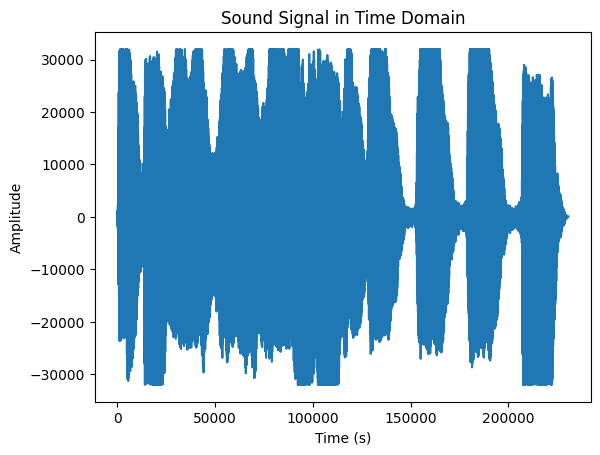

In [96]:

# Open the WAV file
with wave.open('sample.wav', 'rb') as wav_file:
    # Get the sample rate and number of frames
    sample_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    print(num_frames,wav_file.getparams())

    # Read the frames and convert them to a signal
    frames = wav_file.readframes(num_frames)
    signal = np.frombuffer(frames, dtype=np.int16)

# Calculate the time values
time = np.arange(len(signal)) / sample_rate

# Plot the signal in the time domain
plt.plot(signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sound Signal in Time Domain')
plt.show()

# Read the frames and convert them to a signal

# Close the WAV file

Checking if signal length is valid

In [154]:
def check_length(signal):
    length = len(signal)
    next_power_of_two = 2 ** int(np.ceil(np.log2(length)))
    return np.pad(signal, (0, next_power_of_two - length), mode='constant')

def dft(signal):
    
    N = len(signal)
    
    C_k = np.zeros(N, dtype=np.complex_)
    
    for k in range(N):
        
        for n in range(N):
            C_k[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
        
        C_k[k] /= N
    return C_k


def idft(signal):
    
    N = len(signal)
    
    f_j = np.zeros(N, dtype=np.complex_)
    
    for j in range(N):
        
        for k in range(N):
            f_j[j] += signal[k] * np.exp(2j * np.pi * k * j / N)
        
    return f_j
        
    

def fft(signal):
    N = len(signal)
    
    if N <= 1:
        return signal
    
    
    
    fft_even = fft(signal[::2])
    fft_odd = fft(signal[1::2])
    
    k = np.arange(N // 2)
    W_n_k = np.exp(-2j * np.pi * k / N)
    
    A_k = fft_even
    B_k = fft_odd * W_n_k
    
    C_k = np.zeros(N, dtype=np.complex_)
    C_k[:N // 2] = A_k + B_k
    C_k[N // 2:] = A_k - B_k
    
    return C_k 



def ifft(signal):
    return fft(signal.conjugate()) / len(signal)

spliting signal array into two

(array([4.003e+03, 4.900e+01, 1.800e+01, 1.200e+01, 2.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([7.38811961e+02, 9.27198767e+05, 1.85365872e+06, 2.78011868e+06,
        3.70657863e+06, 4.63303859e+06, 5.55949854e+06, 6.48595850e+06,
        7.41241845e+06, 8.33887841e+06, 9.26533836e+06, 1.01917983e+07,
        1.11182583e+07, 1.20447182e+07, 1.29711782e+07, 1.38976381e+07,
        1.48240981e+07, 1.57505580e+07, 1.66770180e+07, 1.76034780e+07,
        1.85299379e+07, 1.94563979e+07, 2.03828578e+07, 2.13093178e+07]),
 <BarContainer object of 23 artists>)

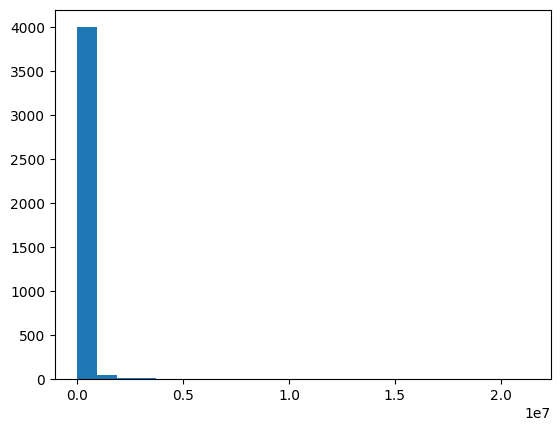

In [148]:
signal_fft = fft(check_length(signal[:4096]))

plt.hist(np.abs(signal_fft), bins=23)

(array([4.003e+03, 4.900e+01, 1.800e+01, 1.200e+01, 2.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([1.80374014e-01, 2.26366886e+02, 4.52553399e+02, 6.78739911e+02,
        9.04926424e+02, 1.13111294e+03, 1.35729945e+03, 1.58348596e+03,
        1.80967247e+03, 2.03585899e+03, 2.26204550e+03, 2.48823201e+03,
        2.71441852e+03, 2.94060504e+03, 3.16679155e+03, 3.39297806e+03,
        3.61916457e+03, 3.84535109e+03, 4.07153760e+03, 4.29772411e+03,
        4.52391062e+03, 4.75009714e+03, 4.97628365e+03, 5.20247016e+03]),
 <BarContainer object of 23 artists>)

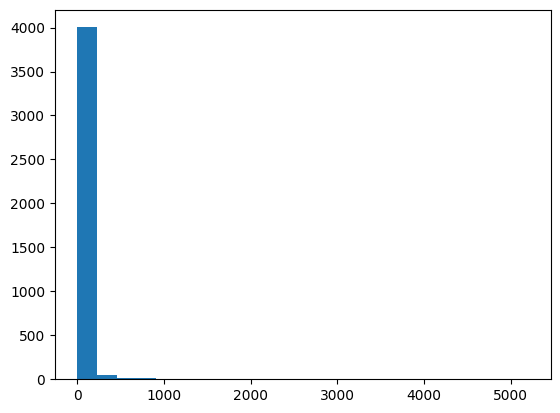

In [150]:
signal_dft = dft(check_length(signal[:4096]))

plt.hist(np.abs(signal_dft), bins=23)


/home/kv/studies/sap/2sap/env/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kv/studies/sap/2sap/env/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


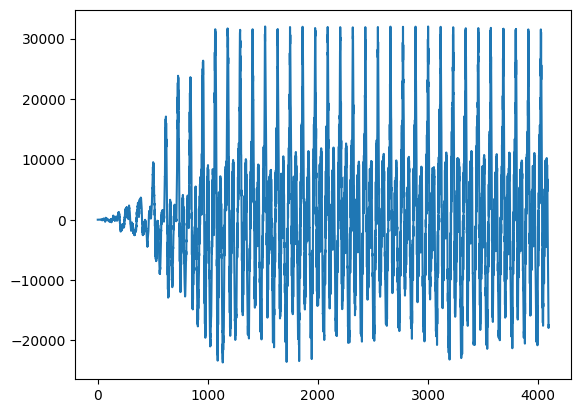

In [152]:
ift = ifft(signal_fft)

plt.plot(ift)

/home/kv/studies/sap/2sap/env/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kv/studies/sap/2sap/env/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


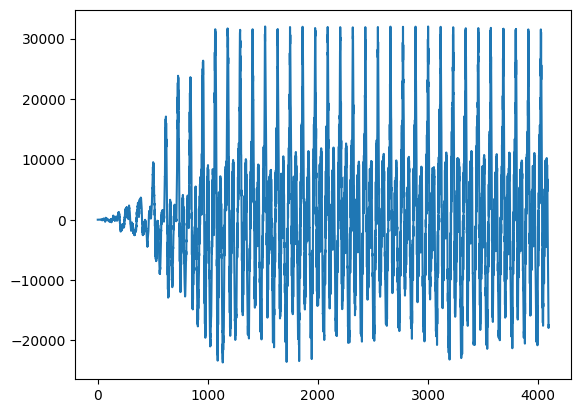

In [155]:
idft = idft(signal_dft)

plt.plot(idft)

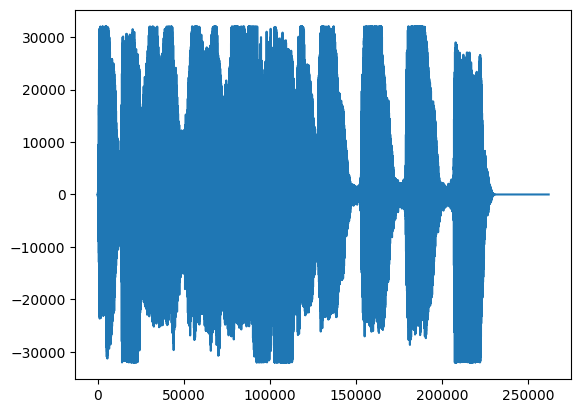

In [92]:

result = np.fft.ifft(signal_fft)


plt.plot(result)

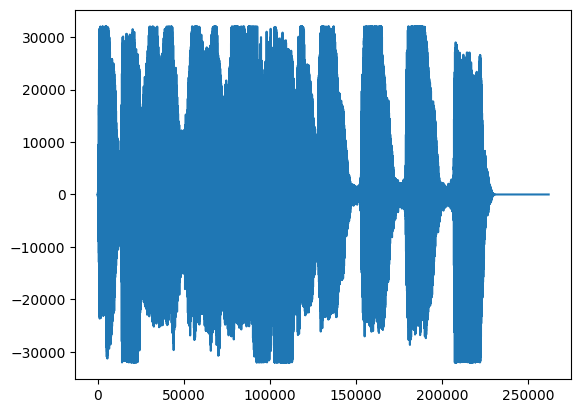

In [93]:
result = ifft(signal_fft)

plt.plot(result)

In [156]:
def low_pass_filter(signal, cutoff_freq, sampling_freq):
    # Apply FFT
    spectrum = fft(signal)
    
    # Compute frequency bins
    N = len(signal)
    freq_bins = np.fft.fftfreq(N, d=1/sampling_freq)
    
    # Apply Filter
    filter_mask = np.abs(freq_bins) <= cutoff_freq
    spectrum_filtered = spectrum * filter_mask
    
    plt.hist(np.abs(spectrum_filtered), bins=23)
    
    # Apply IFFT
    filtered_signal = ifft(spectrum_filtered)
    
    return filtered_signal.real  # Return real part of the filtered signal




In [157]:
def high_pass_filter(signal, cutoff_freq, sampling_freq):
    # Apply FFT
    spectrum = fft(signal)
    
    # Compute frequency bins
    N = len(signal)
    freq_bins = np.fft.fftfreq(N, d=1/sampling_freq)
    
    # Apply Filter
    filter_mask = np.abs(freq_bins) >= cutoff_freq
    spectrum_filtered = spectrum * filter_mask
    
    plt.hist(np.abs(spectrum_filtered), bins=23)
    
    # Apply IFFT
    filtered_signal = ifft(spectrum_filtered)
    
    return filtered_signal.real  # Return real part of the filtered signal

In [158]:
def add_random_noise(signal, noise_level):
    noise = np.random.normal(scale=noise_level, size=len(signal))
    noisy_signal = signal + noise
    return noisy_signal

In [159]:

def output_sound(sample_rate,signal):
# Set the parameters for the WAV file

# Generate a simple sine wave signal

# Create a new WAV file
    with wave.open('output.wav', 'w') as wav_file:
    # Set the WAV file parameters
        wav_file.setnchannels(2)  # Mono audio
        wav_file.setsampwidth(2)  # 2 bytes per sample (16-bit)
        wav_file.setframerate(sample_rate)  # Sample rate

    # Write the signal to the WAV file
        wav_file.writeframes(signal.astype(np.int16).tobytes())
        
    return None

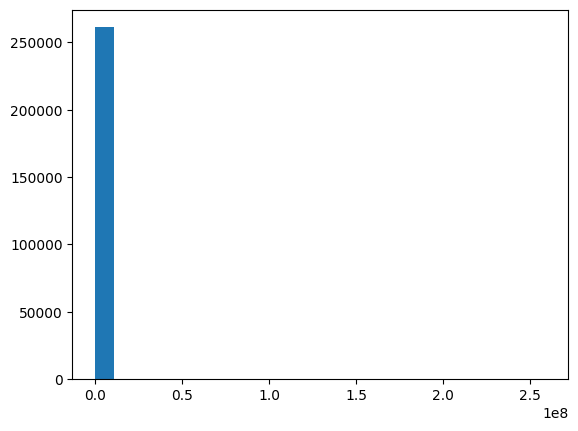

In [163]:
result = low_pass_filter(check_length(signal), 500, sample_rate)
#plt.plot(result)

#result = add_random_noise(signal, 1000)

output_sound(sample_rate,result)


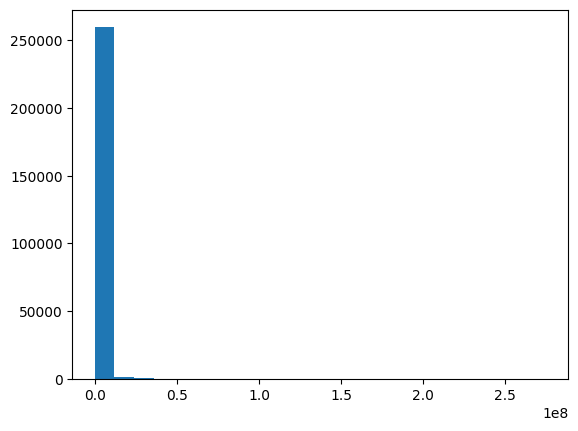

In [166]:
result = high_pass_filter(check_length(signal), 500, sample_rate)
#plt.plot(result)\
    
output_sound(sample_rate,result)